In [2]:
from arcgis import GIS
from IPython.display import display
import getpass

In [3]:
agol_organization = "https://mandela.maps.arcgis.com"
username = input()
password = getpass.getpass() 
gis = GIS(agol_organization, username, password)

keenan0612
········


In [36]:
map = gis.map("Jakarta", zoomlevel = 15)

kebakaran_search = gis.content.search("Kebakaran_2015", item_type="feature service")
kebakaran = kebakaran_search[0]
kebakaran.layers[0].query().df

,BULAN,FID,KABUPATEN,KEBAKARAN,KECAMATAN,KELURAHAN,KERUGIAN,KETERANGAN,KORBAN,OBYEK,WAKTU,id,SHAPE
0,AGUSTUS,1,JAKARTA BARAT,,KEMBANGAN,MERUYA SELATAN,"Rp 100.000.000,-",KORSLETING LISTRIK,,RUMAH GUDANG STEREOFOAM,PKL 09.30-10.00 WIB,1,"{'x': 11881836.767833712, 'y': -692733.1484135..."
1,AGUSTUS,2,JAKARTA TIMUR,,KRAMATJATI,BALEKAMBANG,"Rp 600.000.000,-",AKIBAT PEMBAKARAN SUMPAH,,2 RUMAH TINGGAL & TEMPAT USAHA,PKL 14.50-16.00 WIB,2,"{'x': 11894824.60975825, 'y': -700265.42238715..."
2,AGUSTUS,3,JAKARTA PUSAT,,GAMBIR,GAMBIR,"Rp 150.000.000,-",KORSLETING LISTRIK,,TANGKI SOLAR DAN GENSET,PKL 15.20-15.45 WIB,3,"{'x': 11891006.465844741, 'y': -689475.9942021..."
3,AGUSTUS,4,JAKARTA PUSAT,,TANAH ABANG,KEBON MELATI,"Rp 100.000.000,-",KORSLETING LISTRIK,,GUDANG DI BASEMENT MENARA UOB,PKL 15.45-16.30 WIB,4,"{'x': 11891456.046505138, 'y': -691462.0479348..."
4,AGUSTUS,5,JAKARTA TIMUR,,KRAMAT JATI,CAWANG,"Rp 150.000.000,-",AKIBAT LEDAKAN TABUNG GAS,,WARTEG,PKL 17.45-18.00 WIB,5,"{'x': 11897172.862152472, 'y': -696822.9897699..."
5,AGUSTUS,6,JAKARTA BARAT,,GROGOL PETAMBURAN,JELAMBAR,"Rp 3.000.000,-",KORSLETING LISTRIK,,RUMAH TINGGAL,PKL 19.45-21.15 WIB,6,"{'x': 11887200.186742032, 'y': -687179.1770277..."
6,AGUSTUS,7,JAKARTA TIMUR,,DUREN SAWIT,MALAKA SARI,"Rp 15.000.000,-",KORSLETING LISTRIK,,RUMAH TINGGAL,PKL 21.40-22.25,7,"{'x': 11903351.07209414, 'y': -693869.69583042..."
7,AGUSTUS,8,JAKARTA TIMUR,,DUREN SAWIT,MALAKA SARI,"Rp 300.000.000,-",KORSLETING LISTRIK,,RUMAH TINGGAL 2 LANTAI,PKL 22.55-23.45 WIB,8,"{'x': 11902886.5536323, 'y': -693946.914592340..."
8,AGUSTUS,9,JAKARTA TIMUR,,JATINEGARA,CIPINANG BESAR SELATAN,"Rp 1.700.000.000,-",KORSLETING LISTRIK,,26 RUMAH TINGGAL,PKL 23.05-00.00 WIB,9,"{'x': 11897963.994283697, 'y': -695196.6499835..."
9,AGUSTUS,10,JAKARTA PUSAT,,SENEN,KRAMAT,"Rp 2.500.000.000,-",KORSLETING LISTRIK,,RUMAH TINGGAL,PKL 04.10-06.15 WIB,10,"{'x': 11893778.915595079, 'y': -689256.1866030..."


<Item title:"hidran" type:Feature Layer Collection owner:keenan0612>
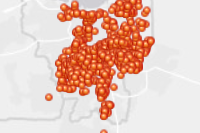

In [23]:
hidran_search = gis.content.search("Hidran", item_type="feature service")
hidran = hidran_search[0]
hidran

In [30]:
map.add_layer(hidran)
map.add_layer(kebakaran)
map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [25]:
import arcgis.features.analysis as analysis

In [31]:
hidran_buffer = analysis.create_buffers(hidran, [0.5], units="Kilometers", dissolve_type="Dissolve")
map.add_layer(hidran_buffer)


In [ ]:
kebakaran_500m = analysis.summarize_within(hidran_buffer, kebakaran)